In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import timedelta
# if using a Jupyter notebook, includue:
%matplotlib inline

import sys
#!{sys.executable} -m pip install seaborn

In [82]:
# Line graph

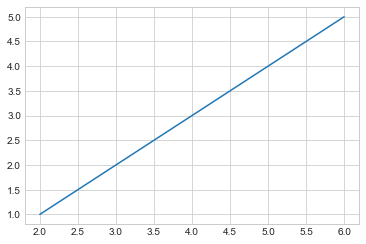

In [83]:
x = [2, 4, 6]
y = [1, 3, 5]
plt.plot(x, y)
plt.show()

In [84]:
# Example

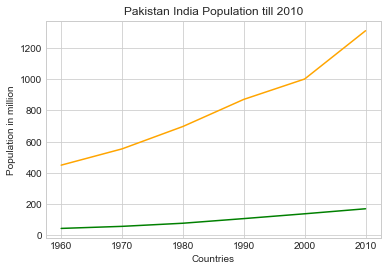

In [85]:
year = [1960, 1970, 1980, 1990, 2000, 2010]
pop_pakistan = [44.91, 58.09, 78.07, 107.7, 138.5, 170.6]
pop_india = [449.48, 553.57, 696.783, 870.133, 1000.4, 1309.1]
plt.plot(year, pop_pakistan, color='g')
plt.plot(year, pop_india, color='orange')
plt.xlabel('Countries')
plt.ylabel('Population in million')
plt.title('Pakistan India Population till 2010')
plt.show()

In [86]:
#Histogram

In [87]:
mu = 80
sigma = 7
x = np.random.normal(mu, sigma, size=200)

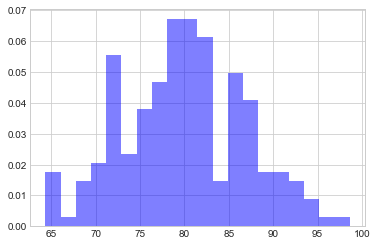

In [88]:
plt.hist(x, 20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

In [89]:
commute_times = [23, 25, 40, 35, 36, 47, 33, 28, 48, 34,
                 20, 37, 36, 23, 33, 36, 20, 27, 50, 34,
                 47, 18, 28, 52, 21, 44, 34, 13, 40, 49]

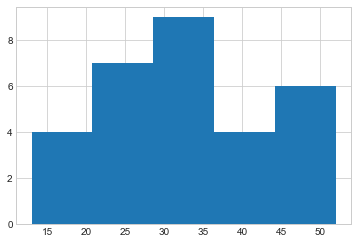

In [90]:
plt.hist(commute_times, 5)

plt.show()

In [91]:
#Bar Graph

In [92]:
aluminum = np.array([6.4e-5, 3.01e-5, 2.36e-5, 3.0e-5, 7.0e-5, 4.5e-5, 3.8e-5, 4.2e-5, 2.62e-5,3.6e-5])
copper = np.array([4.5e-5, 1.97e-5, 1.6e-5, 1.97e-5, 4.0e-5, 2.4e-5, 1.9e-5, 2.41e-5, 1.85e-5,3.3e-5])
steel = np.array([3.3e-5, 1.2e-5, 0.9e-5, 1.2e-5, 1.3e-5, 1.6e-5, 1.4e-5, 1.58e-5, 1.32e-5,2.1e-5])

In [93]:
# Calculate the average
aluminum_mean = np.mean(aluminum)
copper_mean = np.mean(copper)
steel_mean = np.mean(steel)

In [94]:
# Create arrays for the plot
materials = ['Aluminum', 'Copper', 'Steel']
x_pos = np.arange(len(materials))
CTEs = [aluminum_mean, copper_mean, steel_mean]

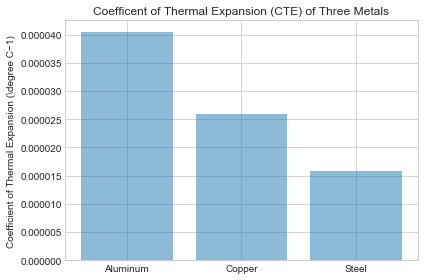

In [95]:
# Build the plot
fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, align='center', alpha=0.5)
ax.set_ylabel('Coefficient of Thermal Expansion (\degree C−1)')
ax.set_xticks(x_pos)
ax.set_xticklabels(materials)
ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
ax.yaxis.grid(True)


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot.png')
plt.show()

In [96]:
#Pie Chart

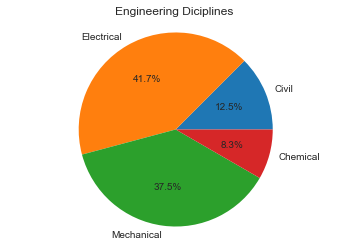

In [97]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Civil', 'Electrical', 'Mechanical', 'Chemical']
sizes = [15, 50, 45, 10]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Engineering Diciplines')


plt.show()

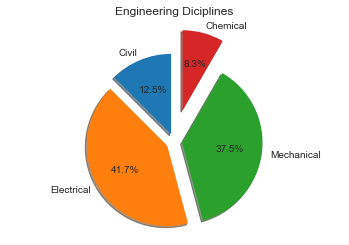

In [98]:
# Explode out the 'Chemical' pie piece by offsetting it a greater amount
explode = (0.1, 0.1, 0.1, 0.4)

fig, ax = plt.subplots()
ax.pie(sizes,
       explode=explode,
       labels=labels,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Engineering Diciplines')


plt.show()

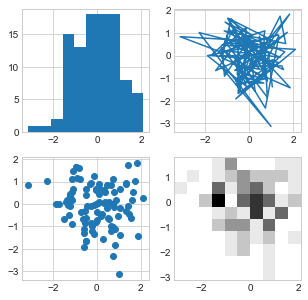

In [99]:
np.random.seed(19680801)
data = np.random.randn(2, 100)

fig, axs = plt.subplots(2, 2, figsize=(5, 5))
axs[0, 0].hist(data[0])
axs[1, 0].scatter(data[0], data[1])
axs[0, 1].plot(data[0], data[1])
axs[1, 1].hist2d(data[0], data[1])

plt.show()

(23814, 5)

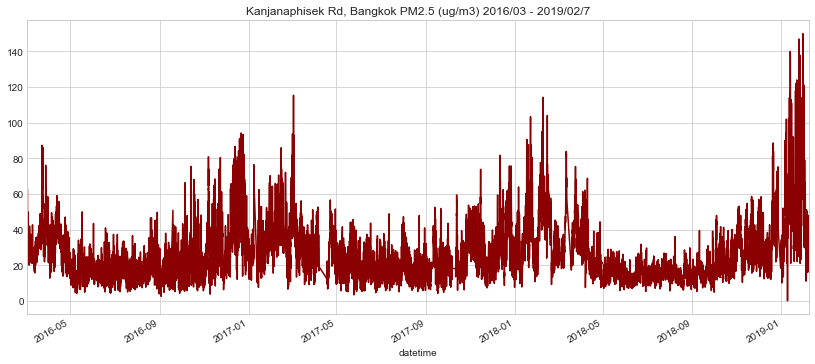

In [100]:
df = pd.read_csv('kanjanaphisek_bangkok_pm25.csv')
df.rename(columns={'UTC Hour':'Hour'}, inplace=True)
df['datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']]) + pd.Timedelta(hours=7) # UTC to Bangkok time
df.index = df['datetime']
df.Hour = df.index.hour # UTC hour to UTC+7
df.drop(columns=['PM10_mask','Retrospective','datetime'],inplace=True)
df['PM2.5'].plot(figsize=(14,6),title="Kanjanaphisek Rd, Bangkok PM2.5 (ug/m3) 2016/03 - 2019/02/7", color='darkred', grid=True)
df.shape

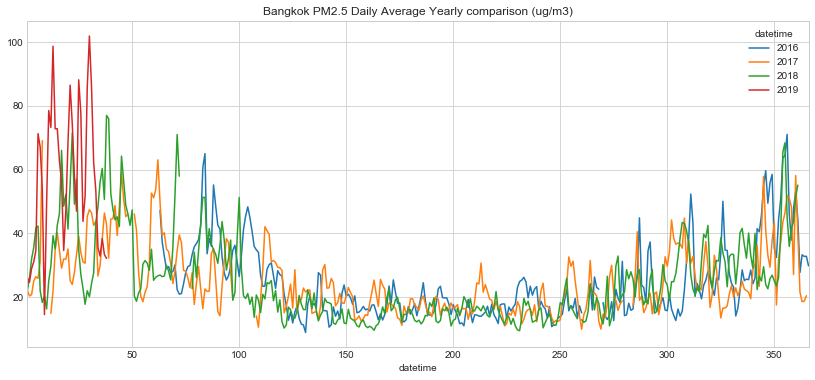

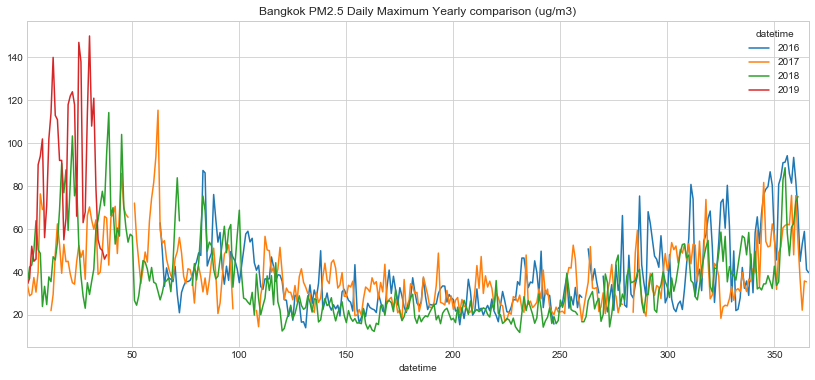

In [101]:
pv = pd.pivot_table(df, index=df.index.dayofyear, columns=df.index.year,
                    values='PM2.5', aggfunc='mean')
pv.plot(title="Bangkok PM2.5 Daily Average Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

pv2 = pd.pivot_table(df, index=df.index.dayofyear, columns=df.index.year,
                    values='PM2.5', aggfunc='max')
pv2.plot(title="Bangkok PM2.5 Daily Maximum Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

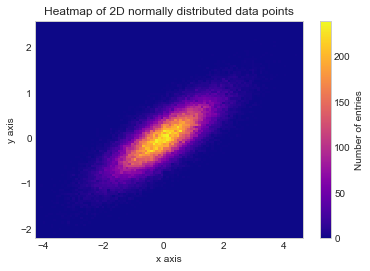

In [102]:
#Heat Map
# Define numbers of generated data points and bins per axis.
N_numbers = 100000
N_bins = 100

# set random seed 
np.random.seed(0)

# Generate 2D normally distributed numbers.
x, y = np.random.multivariate_normal(
        mean=[0.0, 0.0],      # mean
        cov=[[1.0, 0.4],
             [0.4, 0.25]],    # covariance matrix
        size=N_numbers
        ).T                   # transpose to get columns


# Construct 2D histogram from data using the 'plasma' colormap
plt.hist2d(x, y, bins=N_bins, normed=False, cmap='plasma')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of entries')

# Add title and labels to plot.
plt.title('Heatmap of 2D normally distributed data points')
plt.xlabel('x axis')
plt.ylabel('y axis')

# Show the plot.
plt.show()

In [103]:
from mpl_toolkits.mplot3d import Axes3D

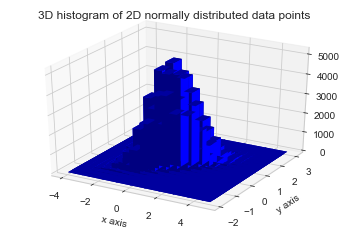

In [104]:
#3D Histogram
# Define numbers of generated data points and bins per axis.
N_numbers = 100000
N_bins = 20

# set random seed 
np.random.seed(0)

# Generate 2D normally distributed numbers.
x, y = np.random.multivariate_normal(
        mean=[0.0, 0.0],      # mean
        cov=[[1.0, 0.4],
             [0.4, 0.25]],    # covariance matrix
        size=N_numbers
        ).T                   # transpose to get columns

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(x, y, bins=N_bins)

# Add title and labels to plot.
plt.title('3D histogram of 2D normally distributed data points')
plt.xlabel('x axis')
plt.ylabel('y axis')

# Construct arrays for the anchor positions of the bars.
# Note: np.meshgrid gives arrays in (ny, nx) so we use 'F' to flatten xpos,
# ypos in column-major order. For numpy >= 1.7, we could instead call meshgrid
# with indexing='ij'.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

# Show the plot.
plt.show()

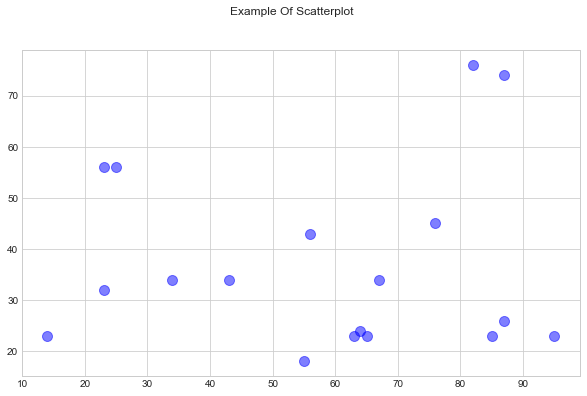

In [105]:
#Scatter Plots

# Data
x = [43,76,34,63,56,82,87,55,64,87,95,23,14,65,67,25,23,85]
y = [34,45,34,23,43,76,26,18,24,74,23,56,23,23,34,56,32,23]

fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Example Of Scatterplot')

# Create the Scatter Plot
ax.scatter(x, y,
            color="blue",    # Color of the dots
            s=100,           # Size of the dots
            alpha=0.5,       # Alpha/transparency of the dots (1 is opaque, 0 is transparent)
            linewidths=1)    # Size of edge around the dots

# Show the plot
plt.show()

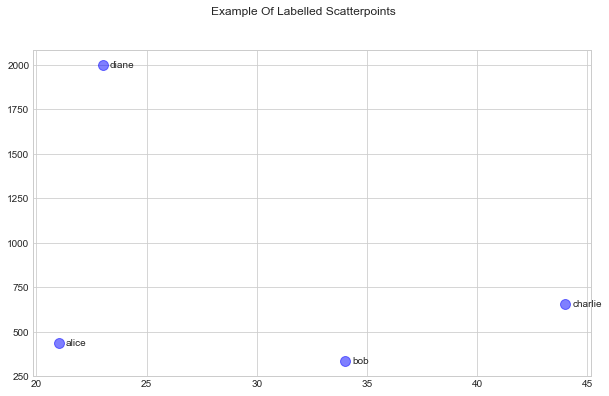

In [106]:
#Scatter Plot with labels
# Data
x = [21, 34, 44, 23]
y = [435, 334, 656, 1999]
labels = ["alice", "bob", "charlie", "diane"]

# Create the figure and axes objects
fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Example Of Labelled Scatterpoints')

# Plot the scatter points
ax.scatter(x, y,
           color="blue",  # Color of the dots
           s=100,         # Size of the dots
           alpha=0.5,     # Alpha of the dots
           linewidths=1)  # Size of edge around the dots

# Add the participant names as text labels for each point
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered

# Show the plot
plt.show()

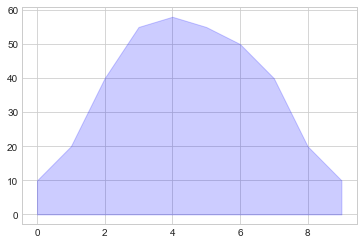

In [107]:
#Shaded Plot
# Data
x =  [0,1,2,3,4,5,6,7,8,9]
y1 = [10,20,40,55,58,55,50,40,20,10]

# Shade the area between y1 and line y=0
plt.fill_between(x, y1, 0,
                 facecolor="orange", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)          # Transparency of the fill

# Show the plot
plt.show()

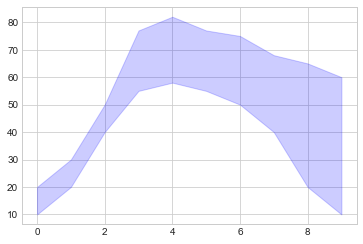

In [108]:
#Shaded Plot between two lines
# Data
x =  [0,1,2,3,4,5,6,7,8,9]
y1 = [10,20,40,55,58,55,50,40,20,10]
y2 = [20,30,50,77,82,77,75,68,65,60]

# Shade the area between y1 and y2
plt.fill_between(x, y1, y2,
                 facecolor="orange", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)          # Transparency of the fill

# Show the plot
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


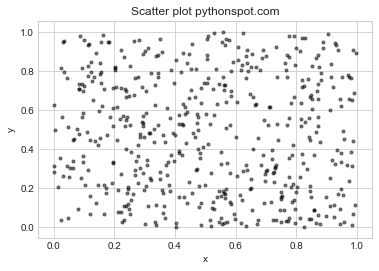

In [109]:
#Scatter Plot
# Create data
N = 500
x = np.random.rand(N)
y = np.random.rand(N)
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [110]:
plt.style.use('seaborn-whitegrid')

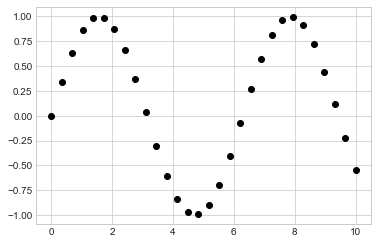

In [111]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

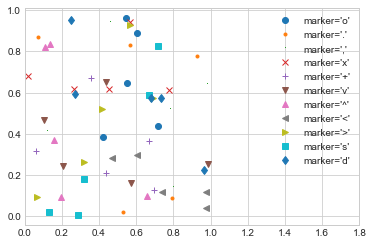

In [112]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

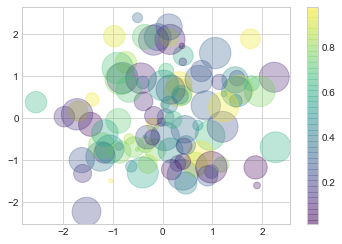

In [113]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

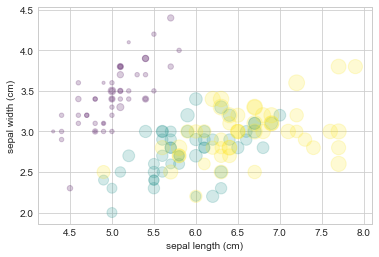

In [114]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

In [ ]:
#Activity
#Download the Excel sheet from the link below

# http://tiny.cc/ft3gkz

#Read the sheet with pandas
#Produce visualizations in the Jupyter Notebooks. You can work in groups and present your Data visualization skills